$\textbf{1.) Set of all permutation be L, where elements of L satisfy following }$

$\sum_{j=1}^{n}jx_j > a$


$\textbf{2.) Let n=4, and a =14. and plot histogram  }$

In [66]:
import itertools
import numpy as np
import matplotlib.pyplot as plt



n = 4
a = 14

all_per = list(itertools.permutations([1,2,3,4]))     #list of all permutations of (1,2,3,4)
all_per = list(map(np.array, all_per))                #converting the tuples inside the list to array          
all_per

L = []            #set of all permutation such that the condition is satisfied

for i in range(len(all_per)):
  if (np.dot(all_per[i],np.array([1,2,3,4])) > a):
    L.append(all_per[i])

L

[array([1, 2, 3, 4]),
 array([1, 2, 4, 3]),
 array([1, 3, 2, 4]),
 array([1, 3, 4, 2]),
 array([1, 4, 2, 3]),
 array([1, 4, 3, 2]),
 array([2, 1, 3, 4]),
 array([2, 1, 4, 3]),
 array([2, 3, 1, 4]),
 array([2, 3, 4, 1]),
 array([2, 4, 1, 3]),
 array([2, 4, 3, 1]),
 array([3, 1, 2, 4]),
 array([3, 1, 4, 2]),
 array([3, 2, 1, 4]),
 array([3, 2, 4, 1]),
 array([3, 4, 1, 2]),
 array([3, 4, 2, 1]),
 array([4, 1, 2, 3]),
 array([4, 1, 3, 2]),
 array([4, 2, 1, 3]),
 array([4, 2, 3, 1]),
 array([4, 3, 1, 2]),
 array([4, 3, 2, 1])]

*We observe that the condition is met for all the elements in the set and hence L contains all the elements
*

In [43]:
def generate_random_per(permu_set):
  size = len(permu_set)
  u = np.random.randint(0,size)
  return permu_set[u]



In [64]:
list_results = []
n_itr = 1000

for i in range(n_itr):
  list_results.append(generate_random_per(L))


dict_results = {}
for i in range(len(L)):
  dict_results[str(L[i])] = 0

for i in range(len(list_results)):
  dict_results[str(list_results[i])] += 1
    

<BarContainer object of 24 artists>

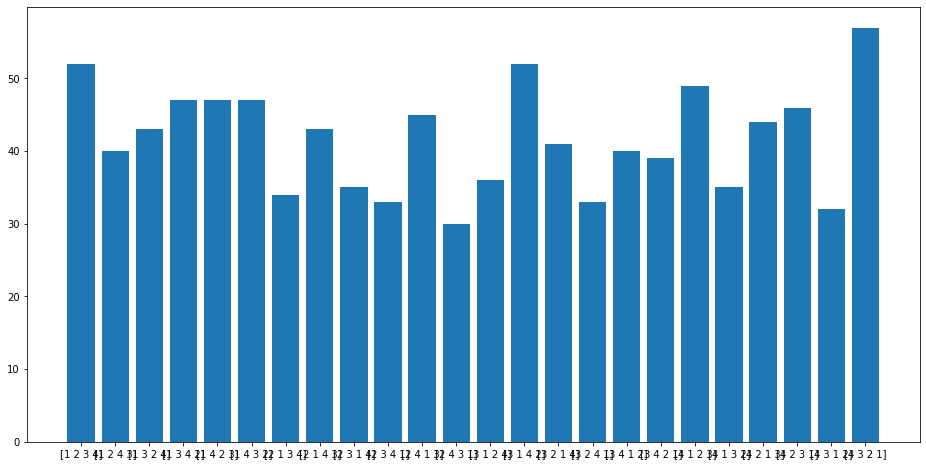

In [78]:
plt.figure(figsize = (16,8))
plt.bar(dict_results.keys(), dict_results.values())

$\textbf{3.) MCMC : Creating function to find and generate neighbor}$

In [88]:
def compute_all_neighbor_and_one_random(input_permu):
  assert type(input_permu) is np.ndarray

  neighbors = []
  for i in range(len(L)):
    dif = L[i] - input_permu
    non_zero_in_diff = sum(dif != np.zeros(len(input_permu)))
    if (non_zero_in_diff==2):
      neighbors.append(L[i])

  u = np.random.randint(0,len(neighbors))
  return neighbors, neighbors[u] 



*Here all the elements in L are the states. So there are total 24 states in our markov model where is state is a permutation of our original array.*


In [101]:
def calculate_Q_i_j(state_i):
  assert type(state_i) is np.ndarray
  a,b =compute_all_neighbor_and_one_random(state_i)
  if (len(a)!= 0):
    return 1/(len(a))
  else:
    print('There are no neighbors, so the toal number of elements in neighbors set is zero and hence we can not probability.')


$\textbf{Example : lets take an input (3,2,1,4) and see its neighbors and calculate the probability of jumping to another state from this state input.} $

In [100]:
a,b = compute_all_neighbor_and_one_random(np.array([3,2,1,4]))

print('All the neighbors of (3,2,1,4) are as follows:', '\n')
print([str(x) for x in a ])

print('\n')
print('Probability Q(i,j) where i is this input state and j is any state is : ' , calculate_Q_i_j(np.array([3,2,1,4])))

All the neighbors of (3,2,1,4) are as follows: 

['[1 2 3 4]', '[2 3 1 4]', '[3 1 2 4]', '[3 2 4 1]', '[3 4 1 2]', '[4 2 1 3]']


Probability Q(i,j) where i is this input state and j is any state is :  0.16666666666666666


$\textbf{4.)Compute $\alpha(i,j)$}$

In [103]:
def compute_alpha_i_j(state_i, state_j):
  a = calculate_Q_i_j(state_j)
  b = calculate_Q_i_j(state_i)

  return min(1, a/b)
  

